Dataset Used : https://www.kaggle.com/vinicius150987/ice-cream-revenue

#Importing the Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Importing the Dataset

In [2]:
dataset = pd.read_csv('IceCreamData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Splitting the Dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Linear Regression model

In [4]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
pred = regressor.predict(X_test)

#Validation

In [6]:
k = 5
kf = KFold(n_splits=5, random_state=None)
model = LinearRegression()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = r2_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.9840884586324629, 0.9759742468786446, 0.9748663513774655, 0.9835811387684941, 0.9735420576976559]
Avg accuracy : 0.9784104506709446


#Data Representation

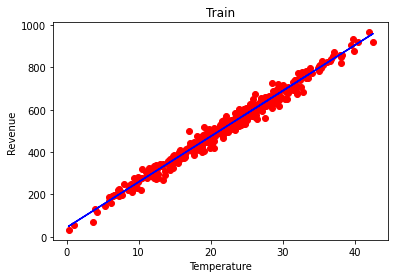

In [7]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train ,regressor.predict(X_train),color='blue')
plt.title('Train')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

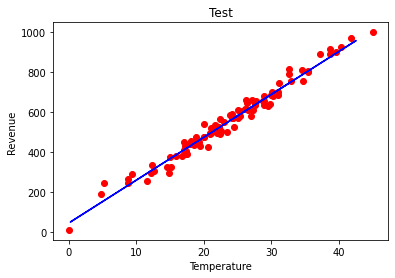

In [8]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train ,regressor.predict(X_train),color='blue')
plt.title('Test')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()